In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_gaussian_reflecting import *

In [2]:
N = 8
K = 10
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [3]:
def potential_term(x):
    return 0*x
def source_zero(t):
    return 0*t

In [4]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)

In [5]:
def u_ana(x,t,sigma,x0):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-t-x0)**2/(2*sigma**2))
    #return 1/2*(np.sin(2*np.pi*(x-t))+ np.sin(2*np.pi*(x+t)))
def v_ana(x,t):
    return 0*x
x_ana = np.linspace(0,1,101)
#x_ana = np.linspace(0,1,101)
#theta_left = np.heaviside(0.6-x_ana,1)
#theta_right = np.heaviside(x_ana-0.6,1)

In [6]:
x0 = 0.5
sigma = 0.05
u = u_ana(x,0,sigma,x0)
v = v_ana(x,0)

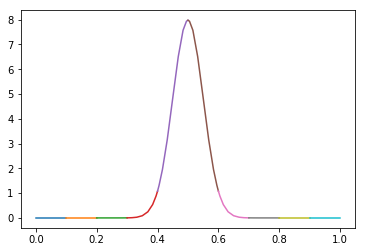

In [7]:
for i in range(len(u)):
    plt.plot(x[i],u[i])

In [8]:
u = u_ana(x,0,sigma,x0)
v = v_ana(x,0)
t = 0.
V = potential_term(x)
t_target = 1.0
dt = CF*dx_min
nt = int((t_target-t)/dt)
print (nt)

25538


In [9]:
#u[0][0]=0
#u[-1][-1]=0

In [10]:
direc = "results_haha"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []

In [11]:
#nt= 3000
u_last = []
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    v[-1][-1] = np.matmul(M_inv_S, u[-1])[-1]
    v = RK4_Step(dt,DG_du_dt_radiative,vn, K,N,t,a2,alpha,M_inv, M_inv_S,source_zero,None,V,un)
    
    u = RK4_Step(dt,DG_du_dt_radiative,un, K,N,t,a1,alpha,M_inv, M_inv_S,source_zero,v  ,V,None)
    
    #u[0][0] = 0
    #u[-1][-1]=0
    t += dt 
    if n%500 ==0:
        plt.figure(figsize=(11, 7), dpi=100)
        for i in range(len(u)):
            plt.plot(x[i],u[i],marker ='o')
            plt.plot(x[i],v[i],linestyle='--')
        plt.ylabel('u')
        plt.ylim(-10,10)
        plt.title('t = '+str(np.round(t,3)))
        plt.legend()
        name = direc+"/figure"+str(np.round(t,3))+'.png'
        plt.savefig(name)
        images.append(imageio.imread(name))
        plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

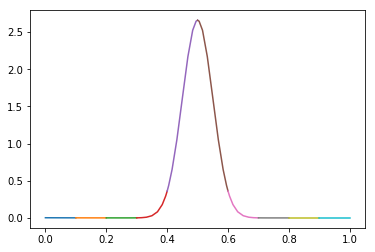

In [12]:
for i in range(len(u)):
    plt.plot(x[i],u[i])

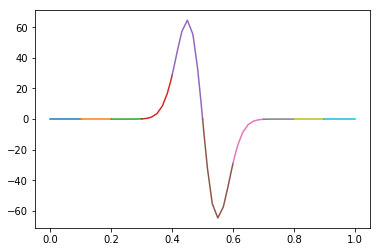

In [13]:
for i in range(len(v)):
    plt.plot(x[i], v[i])
